Whats going on now, years later?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.time import Time
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel, Trapezoid1DKernel
from scipy.optimize import curve_fit
import lightkurve as lk

# add for ref discussion
from astropy.timeseries import LombScargle, BoxLeastSquares

/Users/james/anaconda3/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/james/.lightkurve/cache. Please move all the files in the legacy directory /Users/james/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
Per = 1.568024
E0 = 2441374.5954 # from Glydenkerne+1975, Eqn 1
BJD0_tess = 2457000.


In [6]:
search_result = lk.search_lightcurve('HS Hya', author='SPOC')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 09,2019,SPOC,120,434479378,0.0
1,TESS Sector 35,2021,SPOC,120,434479378,0.0
2,TESS Sector 62,2023,SPOC,120,434479378,0.0


In [7]:
LC = search_result.download_all()

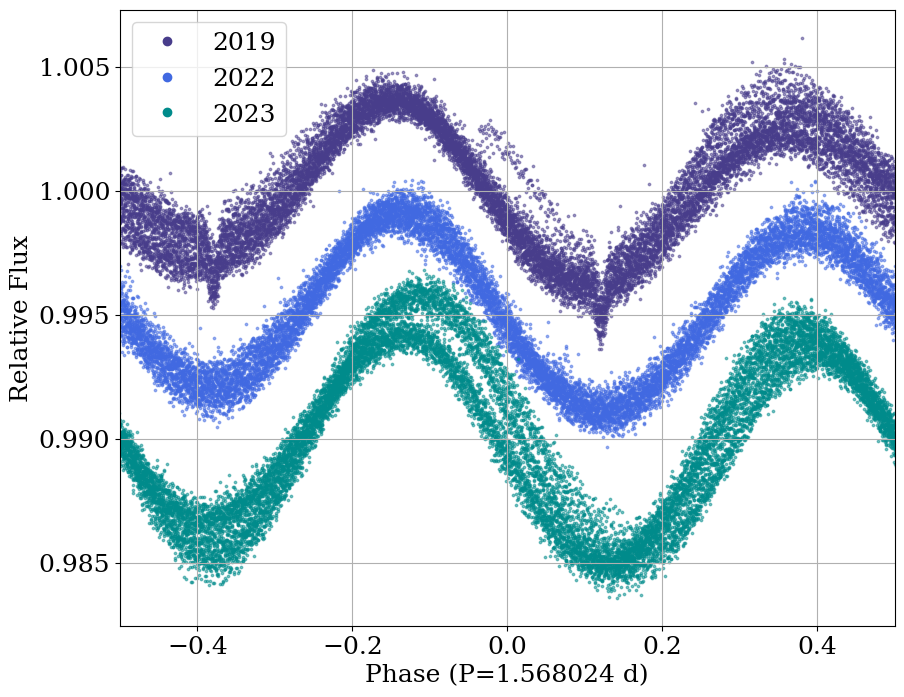

In [36]:
clr = ['DarkSlateBlue', 'RoyalBlue', 'DarkCyan']
lgd = ['2019', '2022', '2023']
plt.figure(figsize=(10,8))

for k in range(len(LC)):
    plt.scatter(((LC[k].time.value+BJD0_tess-E0) % Per)/Per, 
                (LC[k].pdcsap_flux.value/np.nanmedian(LC[k].pdcsap_flux.value)) - k*0.005, 
                s=3, alpha=0.5, c=clr[k])
    plt.scatter(((LC[k].time.value+BJD0_tess-E0) % Per)/Per - 1, 
                (LC[k].pdcsap_flux.value/np.nanmedian(LC[k].pdcsap_flux.value)) - k*0.005, 
                s=3, alpha=0.5, c=clr[k])
    plt.plot([],marker='o',linestyle='none', c=clr[k], label=lgd[k])w


plt.grid(True)
plt.xlabel('Phase (P='+str(Per)+' d)')
plt.ylabel('Relative Flux')
plt.xlim(-0.5,0.5)
plt.legend()
plt.savefig('TESSv2023.png', dpi=150, bbox_inches='tight', pad_inches=0.25)